In [2]:
import warnings
warnings.filterwarnings("ignore")

# Heart Disease Classification Using Machine Learning

A brief overview of the Activity:
Predicting heart disease using various machine learning models on a clinical dataset. This includes data preprocessing, visualization, model training, and performance evaluation.


The dataset used in this project is the Cleveland Heart Disease Dataset, a widely studied dataset from the UCI Machine Learning Repository. It contains detailed patient health records aimed at detecting the presence of heart disease.

📌 Source:
UCI Machine Learning Repository – Heart Disease Dataset

📋 About the Dataset:

Total Samples: 303

Target Variable: target

Binary Classification

0 → Absence of heart disease

1 → Presence of heart disease

Type of Learning: Binary Classification

Number of Features: 13 (extracted from the original 75 attributes)

Feature Types: Mix of categorical (nominal) and numerical variables

Missing Values: None in the 303-sample subset used

| **Feature** | **Description** |
|-------------|-----------------|
| `age`       | Patient's age in years (*Numeric*) |
| `sex`       | Gender: 1 = Male, 0 = Female (*Nominal*) |
| `cp`        | Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic) (*Nominal*) |
| `trestbps`  | Resting blood pressure (mm Hg) (*Numeric*) |
| `chol`      | Serum cholesterol in mg/dl (*Numeric*) |
| `fbs`       | Fasting blood sugar > 120 mg/dl: 1 = True, 0 = False (*Nominal*) |
| `restecg`   | Resting electrocardiogram results (0: Normal, 1: ST-T abnormality, 2: LV hypertrophy) (*Nominal*) |
| `thalach`   | Maximum heart rate achieved (*Numeric*) |
| `exang`     | Exercise-induced angina (1 = Yes, 0 = No) (*Nominal*) |
| `oldpeak`   | ST depression induced by exercise relative to rest (*Numeric*) |
| `slope`     | Slope of the ST segment (0: upsloping, 1: flat, 2: downsloping) (*Nominal*) |
| `ca`        | Number of major vessels colored by fluoroscopy (0–3) (*Nominal*) |
| `thal`      | Thalassemia: 1 = normal, 2 = fixed defect, 3 = reversible defect (*Nominal*) |


# From Raw to Ready: Loading and Cleaning the Heart Dataset
In this step, we load the Cleveland subset of the UCI Heart Disease dataset, which is already clean and complete. Only minimal preprocessing is needed to prepare it for analysis.


Loads the dataset from a .csv file using predefined column names based on the UCI documentation.

Verifies data types of each column to ensure compatibility with machine learning algorithms.

Ensures all values are clean, with no missing data or placeholder symbols.

Confirms data integrity, as all 303 rows and 14 columns are complete and ready for use.

No missing value imputation or row removal is required — the dataset is already analysis-ready.

In [3]:
import pandas as pd
import numpy as np

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak", "slope",
    "ca", "thal", "target"
]

df = pd.read_csv("Heart_disease_cleveland_new.csv", names=columns, header=0)

df = df.apply(pd.to_numeric, errors='coerce')

df.dropna(inplace=True)

print("\n=== Dataset Info ===")
print(df.info())

print("\n=== First 5 Rows ===")
print(df.head())

print("\n=== Missing Values After Cleaning ===")
print(df.isnull().sum())



=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

=== First 5 Rows ===
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67  

# Refining the Pulse: Data Preprocessing for Precision

This step ensures our dataset is clean, consistent, and model-ready. We replace missing values, convert data types, normalize key features like age and cholesterol, and encode categorical variables. Finally, we split the data into training and test sets — laying the foundation for accurate heart disease prediction.

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv("Heart_disease_cleveland_new.csv")

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

scaler = StandardScaler()
df[['age', 'chol', 'trestbps']] = scaler.fit_transform(df[['age', 'chol', 'trestbps']])

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8688524590163934

Confusion Matrix:
 [[26  3]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# Silencing the Noise: Detecting & Removing Outliers
Outliers are the disruptive data points that can distort patterns, confuse models, and lead to misleading insights. In this phase, we apply statistical filtering using the Interquartile Range (IQR) method to identify and remove such anomalies. By performing this step after scaling, we refine the dataset’s integrity — ensuring that only the true signals from the heart of the data guide our machine learning model.

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv("Heart_disease_cleveland_new.csv")

def detect_and_log_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return cleaned, outliers

all_outliers = pd.DataFrame()

for col in ['age', 'chol', 'trestbps']:
    df, outliers = detect_and_log_outliers(df, col)
    outliers['outlier_feature'] = col
    all_outliers = pd.concat([all_outliers, outliers])

print("Outliers removed:")
print(all_outliers)

print(f"\nDataset shape after outlier removal: {df.shape}")

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

scaler = StandardScaler()
df[['age', 'chol', 'trestbps']] = scaler.fit_transform(df[['age', 'chol', 'trestbps']])

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Outliers removed:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
48    65    0   2       140   417    1        2      157      0      0.8   
121   63    0   3       150   407    0        2      154      0      4.0   
152   67    0   2       115   564    0        2      160      0      1.6   
173   62    0   3       140   394    0        2      157      0      1.2   
181   56    0   3       134   409    0        2      150      1      1.9   
14    52    1   2       172   199    1        0      162      0      0.5   
83    68    1   2       180   274    1        2      150      1      1.6   
126   56    0   3       200   288    1        2      133      1      4.0   
172   59    0   3       174   249    0        0      143      1      0.0   
183   59    1   0       178   270    0        2      145      0      4.2   
188   54    1   1       192   283    0        2      195      0      0.0   
201   64    0   3       180   325    0        0      154      1      0

# 📊 Exploratory Data Analysis (EDA): Uncovering Patterns and Insights
This section performs an insightful visual exploration of the Heart Disease dataset. It begins with histograms to show feature distributions, followed by a correlation heatmap to reveal relationships between variables. We then dive into univariate analysis (age and target distribution), move into bivariate analysis (cholesterol vs target), and wrap up with a pairplot to observe interactions among key features. These visualizations help us identify trends, data spread, class imbalances, and potential outliers — setting the stage for effective model building.

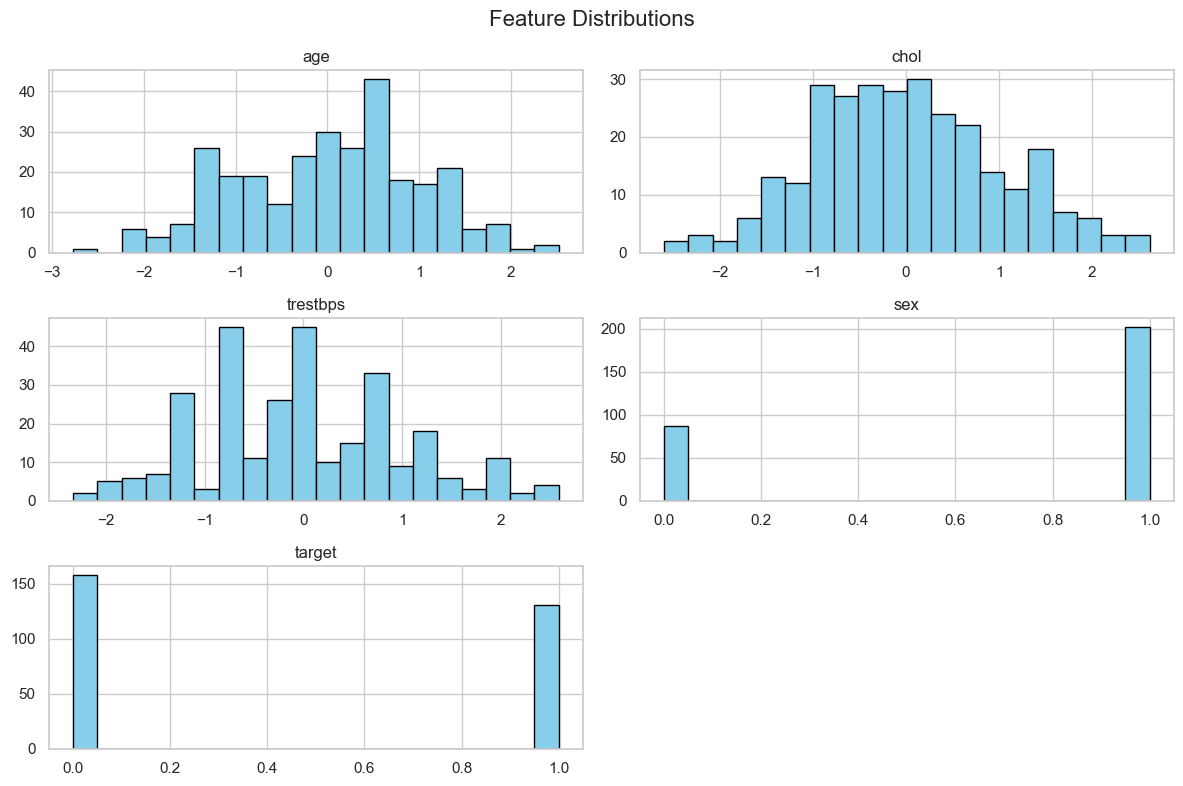

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

features = ['age', 'chol', 'trestbps', 'sex', 'target']
df[features].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

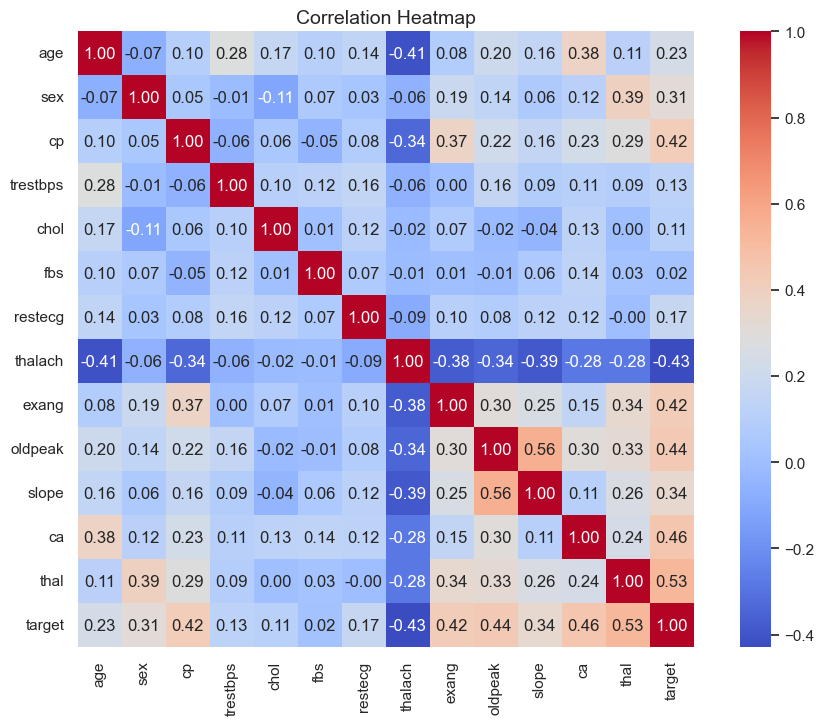

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

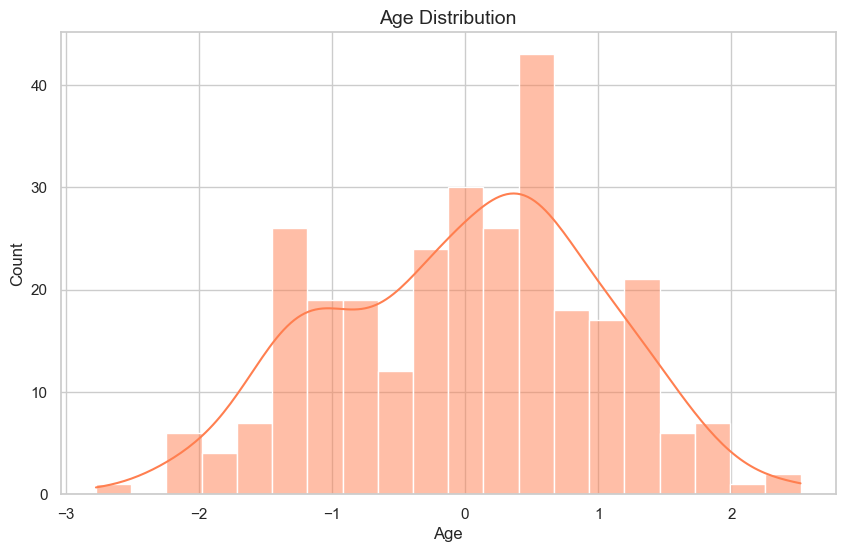

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='coral')
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

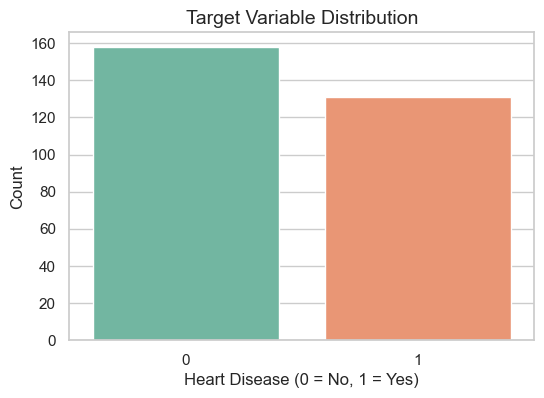

In [9]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette='Set2')
plt.title("Target Variable Distribution", fontsize=14)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

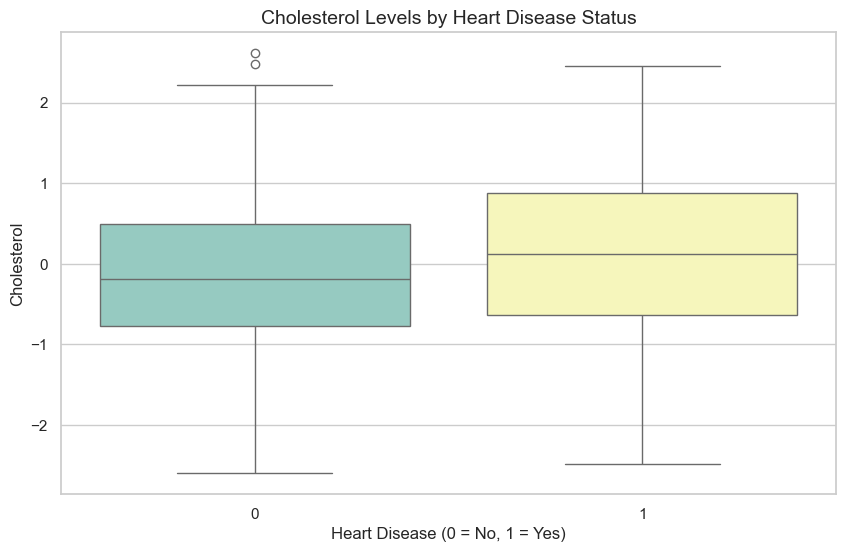

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='chol', palette='Set3')
plt.title("Cholesterol Levels by Heart Disease Status", fontsize=14)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.show()


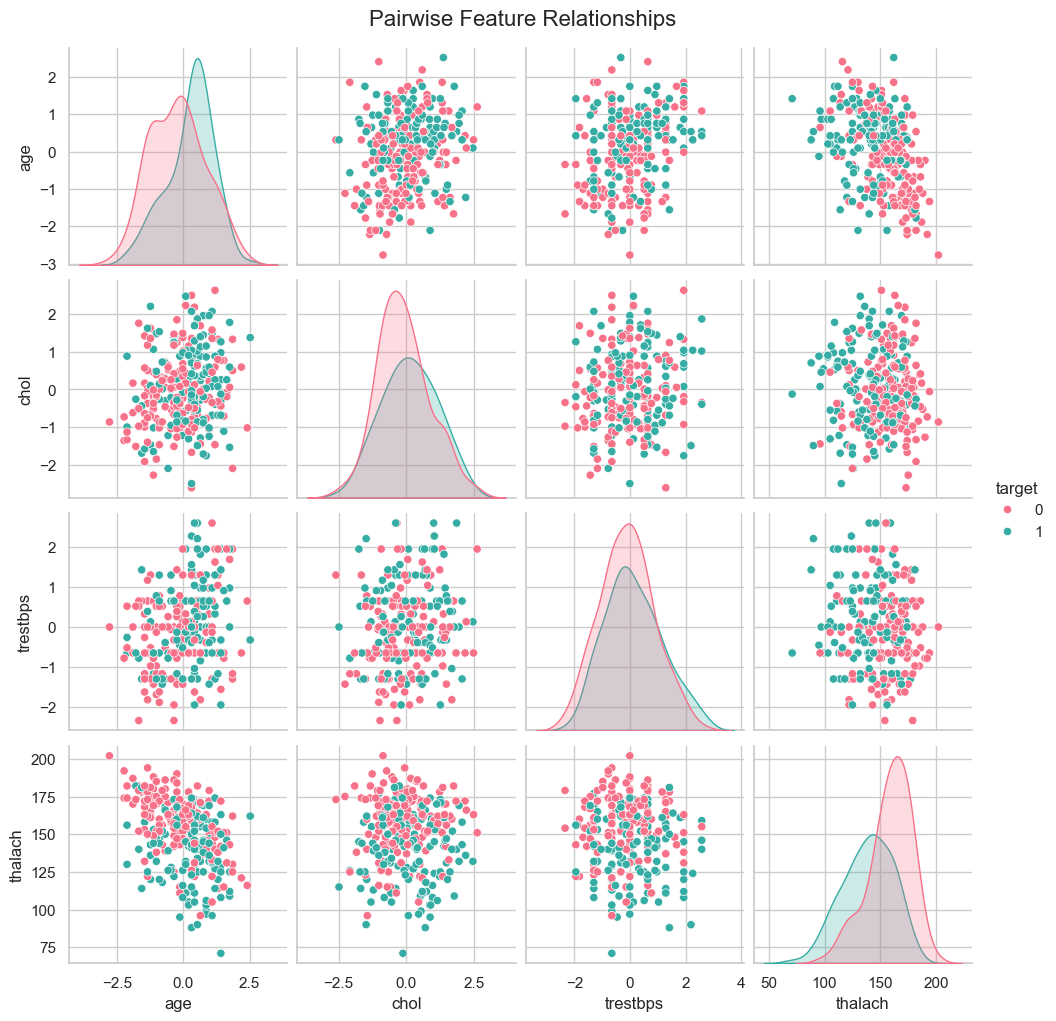

In [11]:
selected_features = ['age', 'chol', 'trestbps', 'thalach', 'target']
sns.pairplot(df[selected_features], hue='target', palette='husl', diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", fontsize=16, y=1.02)
plt.show()


#  Feature Engineering, Selection & Logistic Regression Evaluation
This step enhances the dataset by creating new informative features, selects top predictors, and builds a Logistic Regression model to predict heart disease. After scaling, the model is trained and evaluated using accuracy score, confusion matrix, and a classification report. This phase bridges raw data and predictive insights, ensuring that our features contribute meaningfully to the model’s decision-making process.



In [12]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df['chol_per_age'] = df['chol'] / df['age']
df['thalach_per_age'] = df['thalach'] / df['age']
df['oldpeak_slope'] = df['oldpeak'] * df['slope']

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\n=== Model Evaluation ===")
print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix, "\n")
print("Classification Report:")
print(class_report)



=== Model Evaluation ===
Accuracy: 0.9138

Confusion Matrix:
[[26  3]
 [ 2 27]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.90      0.93      0.92        29

    accuracy                           0.91        58
   macro avg       0.91      0.91      0.91        58
weighted avg       0.91      0.91      0.91        58



# SVM Classifier with SMOTE for Balanced Heart Disease Prediction
Heart disease datasets often suffer from class imbalance, making it harder for models to correctly identify patients with heart disease. To address this, we use SMOTE (Synthetic Minority Over-sampling Technique) to balance the training set, and then train a Support Vector Machine (SVM) classifier with an RBF kernel. Finally, we evaluate the model with metrics like accuracy, classification report, and a confusion matrix heatmap to verify its performance.

=== SVM with SMOTE Evaluation ===
Accuracy: 0.7759

Confusion Matrix:
 [[25  7]
 [ 6 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.74      0.77      0.75        26

    accuracy                           0.78        58
   macro avg       0.77      0.78      0.77        58
weighted avg       0.78      0.78      0.78        58



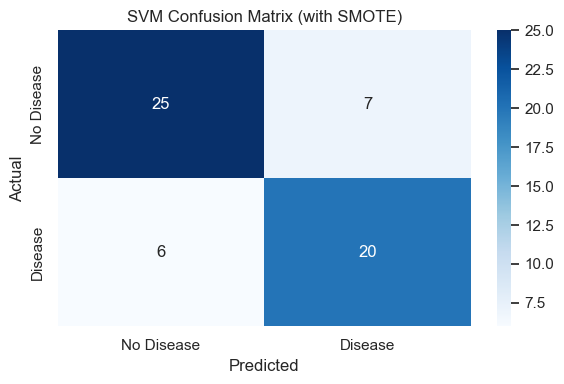

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train_balanced, y_train_balanced)

y_pred_svc = svc_model.predict(X_test_scaled)

svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_report = classification_report(y_test, y_pred_svc, zero_division=0)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)

print("=== SVM with SMOTE Evaluation ===")
print(f"Accuracy: {svc_accuracy:.4f}\n")
print("Confusion Matrix:\n", svc_conf_matrix)
print("\nClassification Report:\n", svc_report)

plt.figure(figsize=(6, 4))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("SVM Confusion Matrix (with SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# Heart Disease Prediction using XGBoost with SMOTE and Feature Scaling
This section uses the XGBoost classifier to predict heart disease. Since medical datasets often have imbalanced classes (e.g., fewer positive heart disease cases), we apply SMOTE (Synthetic Minority Oversampling Technique) to balance the classes. Additionally, we standardize the features using StandardScaler to improve model convergence. XGBoost, being a powerful ensemble gradient boosting algorithm, is well-suited for capturing complex feature interactions.

=== XGBoost Classifier Evaluation ===
Accuracy: 0.8125

Confusion Matrix:
 [[30  6]
 [ 6 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        36
           1       0.79      0.79      0.79        28

    accuracy                           0.81        64
   macro avg       0.81      0.81      0.81        64
weighted avg       0.81      0.81      0.81        64



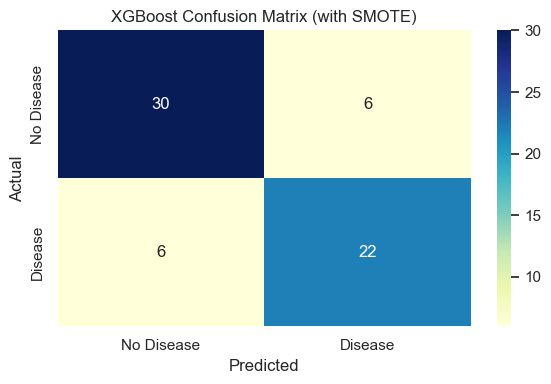

In [14]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=['target'])
y = df['target']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("=== XGBoost Classifier Evaluation ===")
print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("XGBoost Confusion Matrix (with SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


 # Random Forest Classifier for Heart Disease Prediction using the Cleveland Dataset
This code trains a Random Forest model on the Heart Disease Cleveland dataset to predict the presence of heart disease (target variable). The model benefits from class balancing using SMOTE and is evaluated through accuracy, a confusion matrix, and a classification report. Despite Random Forest not requiring feature scaling, standardization is applied to explore its effect on performance.



In [15]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

df = pd.read_csv('Heart_disease_cleveland_new.csv')  # Use the correct path if running locally

X = df.drop(columns=['target'])
y = df['target']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("=== Random Forest with SMOTE ===")
print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix, "\n")
print("Classification Report:")
print(class_report)


=== Random Forest with SMOTE ===
Accuracy: 0.7424

Confusion Matrix:
[[23  7]
 [10 26]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        30
           1       0.79      0.72      0.75        36

    accuracy                           0.74        66
   macro avg       0.74      0.74      0.74        66
weighted avg       0.75      0.74      0.74        66



# Logistic Regression for Heart Disease Prediction
Logistic Regression is a fundamental classification algorithm used to model the probability of a binary outcome. Here, it helps predict the presence of heart disease using a linear decision boundary.

In [16]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


=== Logistic Regression ===
Accuracy: 0.7727272727272727
Confusion Matrix:
 [[25  5]
 [10 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77        30
           1       0.84      0.72      0.78        36

    accuracy                           0.77        66
   macro avg       0.78      0.78      0.77        66
weighted avg       0.78      0.77      0.77        66



# K-Nearest Neighbors (KNN) Classifier
KNN is a simple, instance-based learning algorithm that classifies a data point based on the majority label of its nearest neighbors. It's intuitive and can be powerful with proper feature scaling.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("=== K-Nearest Neighbors ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


=== K-Nearest Neighbors ===
Accuracy: 0.6363636363636364
Confusion Matrix:
 [[17 13]
 [11 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.57      0.59        30
           1       0.66      0.69      0.68        36

    accuracy                           0.64        66
   macro avg       0.63      0.63      0.63        66
weighted avg       0.63      0.64      0.64        66



# Naive Bayes Classifier
Naive Bayes is a probabilistic classifier based on Bayes’ Theorem. It assumes feature independence and works surprisingly well for high-dimensional data such as patient medical records.

In [18]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


=== Naive Bayes ===
Accuracy: 0.7727272727272727
Confusion Matrix:
 [[24  6]
 [ 9 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        30
           1       0.82      0.75      0.78        36

    accuracy                           0.77        66
   macro avg       0.77      0.78      0.77        66
weighted avg       0.78      0.77      0.77        66

